# Medical Cost Personal Datasets:

## initializing dataset

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_6/task_1/insurance 2.csv")

## Data Distribution

| Range | Value | Range | Value | Range | Value |
| ----- | ----- | ----- | ----- | ----- | ----- |
| <2000 | 92    | 6-7   | 73    | 20-25 | 72    |
| 2k-3k | 98    | 7-8   | 68    | 25-30 | 39    |
| 3k-4k | 78    | 8-9   | 78    | 30-35 | 29    |
| 4-5k  | 90    | 9-10  | 64    | 35-40 | 54    |
| 5-6   | 70    | 10-11 | 60    | 40-45 | 41    |
| 11-12 | 74    | 12-13 | 57    | 45-50 | 31    |
| 13-14 | 45    | 14-15 | 32    | 50-55 | 2     |
| 15-16 | 12    | 16-17 | 15    | 55-60 | 2     |
| 17-18 | 18    | 18-19 | 19    | 60-65 | 3     |
| 19-20 | 21    |       |       |       |       |



## Encoding Textual data

In [3]:
label_encoder = LabelEncoder()
df["region"] = label_encoder.fit_transform(df["region"])

In [4]:
df["sex"] = label_encoder.fit_transform(df["sex"])

In [5]:
df["smoker"] = label_encoder.fit_transform(df["smoker"])

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Splitting into train and test

In [7]:
X = df.iloc[:, 1:6]
X

,sex,bmi,children,smoker,region
0,0,27.900,0,1,3
1,1,33.770,1,0,2
2,1,33.000,3,0,2
3,1,22.705,0,0,1
4,1,28.880,0,0,1
...,...,...,...,...,...
1333,1,30.970,3,0,1
1334,0,31.920,0,0,0
1335,0,36.850,0,0,2
1336,0,25.800,0,0,3


In [8]:
y = df.iloc[:, 6]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## splitting the data into train and test sets


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Scale the training and test features

In [10]:
minmax = MinMaxScaler(feature_range=(0, 1))
x2 = minmax.fit_transform(X_train[["bmi", "children"]])
X_train[["bmi", "children"]] = x2

In [11]:
x3 = minmax.transform(X_test[["bmi", "children"]])
X_test[["bmi", "children"]] = x3

# Regression

## Training the Model

In [12]:
'''
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

print(y_test_log)
'''

'\ny_train_log = np.log1p(y_train)\ny_test_log = np.log1p(y_test)\n\nprint(y_test_log)\n'

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer='adam',
    metrics=['mae']
)

model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

y_pred = model.predict(X_test).ravel()

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13506.4287 - mae: 13506.4287 - val_loss: 12268.0479 - val_mae: 12268.0479
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13283.0879 - mae: 13283.0879 - val_loss: 11553.0547 - val_mae: 11553.0547
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10970.7178 - mae: 10970.7178 - val_loss: 8071.1504 - val_mae: 8071.1504
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8473.8643 - mae: 8473.8643 - val_loss: 7675.1216 - val_mae: 7675.1216
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7956.6382 - mae: 7956.6382 - val_loss: 7358.6245 - val_mae: 7358.6245
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7424.7954 - mae: 7424.7954 - val_loss: 6751.9927 - val_mae: 6751.9927
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6779.3467 - mae: 6779.3467 - val_loss: 6181.9146 - val_mae: 6181.9146
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6247.8882 - mae: 6247.8882 -

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
library_pred = lr.predict(X_test).ravel()

In [16]:
print("for scikitlearn Library = ", r2_score(y_test, library_pred))
print(r2_score(y_test, y_pred))

for scikitlearn Library =  0.6361589291747685
0.6689524243960635


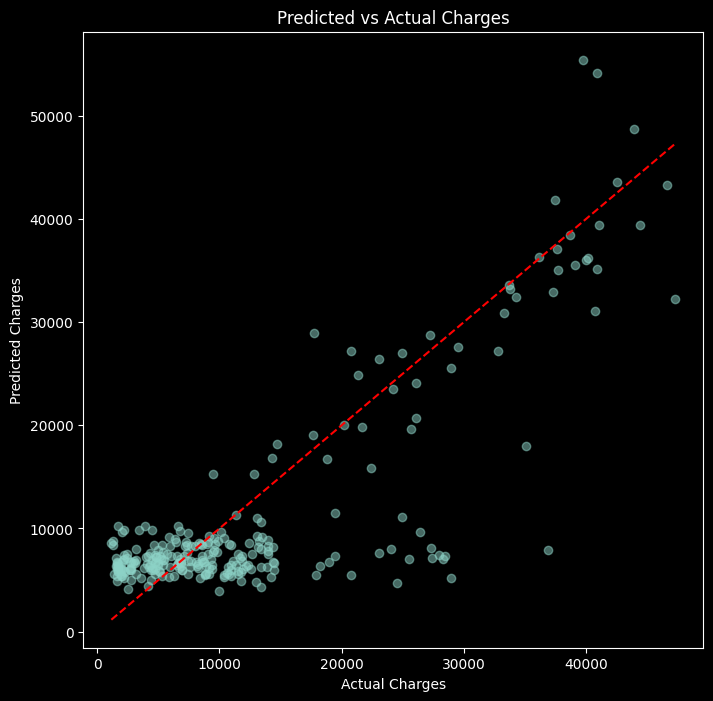

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()


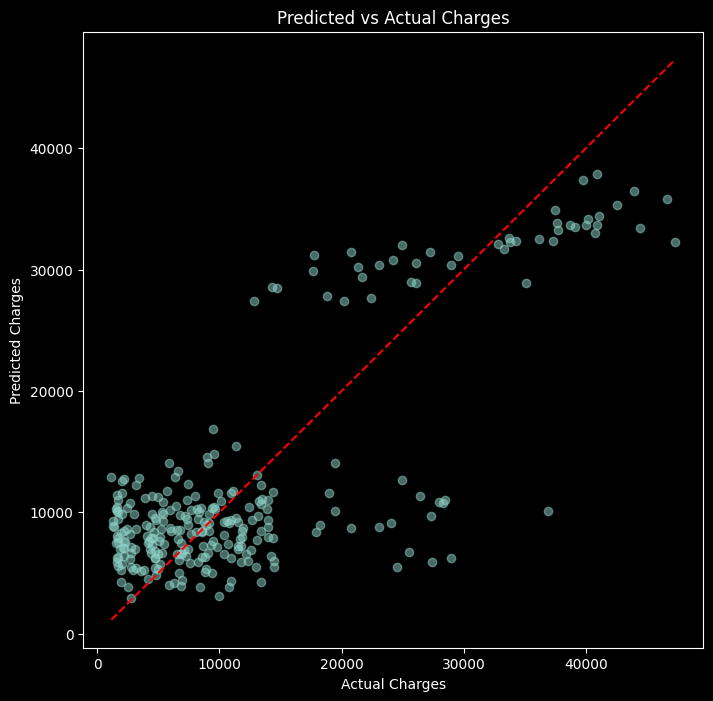

In [18]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, library_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()

In [ ]:
X_train

# Decision Tree

In [19]:
import xgboost as xgb

# DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train regression model
model_xgboost = xgb.train(
    params={"objective": "reg:squarederror", "eval_metric": "mae"},
    dtrain=dtrain,
    num_boost_round=10,
    evals=[(dtrain, "train"), (dtest, "test")]
)


[0]	train-mae:7226.46364	test-mae:7107.06616
[1]	train-mae:5939.84649	test-mae:6093.67112
[2]	train-mae:5118.38498	test-mae:5439.15925
[3]	train-mae:4535.64716	test-mae:5017.82622
[4]	train-mae:4195.80973	test-mae:4748.18048
[5]	train-mae:3980.80548	test-mae:4636.13335
[6]	train-mae:3869.92080	test-mae:4580.21166
[7]	train-mae:3789.96650	test-mae:4573.44929
[8]	train-mae:3731.87148	test-mae:4564.20279
[9]	train-mae:3677.43131	test-mae:4577.85309


In [20]:
y_pred_xg = model_xgboost.predict(dtest)
print(r2_score(y_test, y_pred_xg))

0.6915585141886883


In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_xg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()